## 利用 Acceptance/Rejection Method 產生標準常態分配樣本

### Part I. Compute c for the A/R method

We aim to use A/R method to generate a random sample from standard normal distribution.
Our alternative distribution $g(x)$ is an exponential distribution with $\lambda=1$ 

 $g(x) = \lambda e^{-\lambda x}, x>0, \lambda=1$ and 
 $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, 0\leq x<\infty$ are given.

First, we prove that the alternative $cg(x) = \sqrt{\frac{2e}{\pi}}e^{-x},x>0$ can be used to generaterandom samples of standard normal distribution by rejection method.

Since $g(x) = e^{-x},x>0$ is everywhere higher than the standard normal density $f$ for $X \geq 0$, and $cg(x)$ has to be higher than the truncated distribution $\phi^{*}(x) = \frac{2}{\sqrt{2\pi}}e^{- \frac{x^2}{2}}$, for $0\leq x <\infty$.

This can be written as an inequality equation 
$$ce^{-x} \geq \sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}}, \forall x \geq 0$$

$$\Rightarrow c \geq \sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}$$

We denote $h(x) = \frac{f(x)}{g(x)} = \sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}$ and solve $h'(x)=0$ to compute its maximum.

$h'(x) = (1-x)e^{x-\frac{x^2}{2}}=0$ shows that the highest value occurs at $x=1$.
Moreover, $h''(x) = -(1-x)^2e^{x-\frac{x^2}{2}}<0$ assures that $x=1$ is maximum.

Hence we compute $c = \sqrt{\frac{2}{\pi}}e^{1-\frac{1^2}{2}} = \sqrt{\frac{2e}{\pi}}$.

### Part II. Application with Python

The original algorithm for generating a random sample of $\phi,Z\sim N(0,1)$:

 1. Generate $Y$ with $Exp(\lambda=1)$. Because $-ln(U) \sim Exp(\lambda=1)$ ($U \sim U[0,1]$), we set $Y=-ln(U)$.
 2. Generate $U_1 \sim U[0,1]$.
 3. If $U \leq \frac{f(y)}{cg(y)} = e^{-\frac{(y-1)^2}{2}}$ then set $\mid Z\mid = Y$, otherwise go back to step 1.
 4. Generate $U_2 \sim U[0,1]$. If $U_2 \leq 0.5$ then set Z = $\mid Z\mid$, otherwise set Z = $-\mid Z\mid$.
 
By rewriting $U \leq e^{-\frac{(y-1)^2}{2}}$ as $-lnU \geq \frac{(Y-1)^2}{2}$ in step 3, we can simplify the original algorithm to the following:

 1. Generate $Y_1 = -lnU_1$ and $Y_2 = -lnU_2$
 2. If $Y_2 \geq \frac{(Y_1-1)^2}{2}$ then set $\mid Z\mid = Y_1$, otherwise go back to step 1.
 3. Generate $U_3 \sim U[0,1]$. Set $Z = \mid Z\mid$ if $U_3 \leq 0.5$, otherwise set $Z = -\mid Z\mid$. 

In [ ]:
n <- 10000
cnt = 0 # accepted counts
z.abs <- c()
z <- c()
for (i in 1:n){
  y1 <- (-log(runif(1,0,1)))
  y2 <- (-log(runif(1,0,1)))
  if(y2 >= ((y1-1)^2)/2){
    cnt = cnt + 1
    z.abs[cnt] <- y1
  }
}
cnt/n # acceptance rate
z.pos <- c(); z.neg <- c()
cnt.pos = 0; cnt.neg = 0
for (j in 1:length(z.abs)){
  u <- runif(1,0,1)
  if(u <= 0.5){
    cnt.pos = cnt.pos + 1
    z.pos[cnt.pos] <- z.abs[j]
  }else{
    cnt.neg = cnt.neg + 1
    z.neg[cnt.neg] <- -(z.abs[j])
  }
}

In [20]:
import math
import numpy as np

n = 10000
cnt = 0 # accepted counts (用以存取 10000 個數字中，有多少個被接受)
z_abs = [] #用以存放 z 的取絕對值數列
for i in range(n):
    y1 = -(math.log(np.random.uniform(low=0, high=1, size=1)))
    y2 = -(math.log(np.random.uniform(low=0, high=1, size=1)))
    if y2 >= ((y1-1)**2)/2:
        cnt = cnt + 1
        z_abs.append(y1)
print(cnt/n) # acceptance rate 應接近 0.76，即 1/c

0.7569


In [40]:
z_pos = []; z_neg = []
cnt_pos = 0; cnt_neg = 0
for j in range(len(z_abs)):
    u = np.random.uniform(0,1,1)
    if u >= 0.5:
        cnt_pos = cnt_pos + 1
        z_pos.append(z_abs[j])
    else:
        cnt_neg = cnt_neg + 1
        z_neg.append(-z_abs[j])
z = z_pos + z_neg
len(z)

7569

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


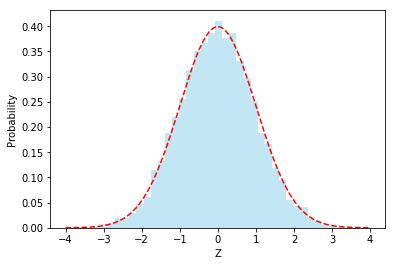

In [71]:
from scipy.stats import norm
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mu = 0
variance = 1
sigma = math.sqrt(variance)
bins = np.linspace(-4, 4, len(z))

plt.hist(z, bins=40, normed=1, facecolor='skyblue', alpha=0.5) #畫出產生的樣本之直方圖
y = mlab.normpdf(bins, mu, sigma) #真正常態分配的 density
plt.plot(bins, y, 'r--')
plt.ylabel('Probability')
plt.xlabel('Z')
plt.show()